In [1]:
from sklearn.neighbors import NearestNeighbors
import pandas as pd
import numpy as np
from scipy import spatial
from astropy.table import Table
from astropy.cosmology import LambdaCDM as Cos
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy import units as u
import matplotlib.pyplot as plt
from IPython import display 
from scipy import stats
from scipy.interpolate import interp1d
from scipy.stats import norm
import fitsio

import pickle
import dask

In [2]:
from dask.distributed import Client, LocalCluster
cluster = LocalCluster(n_workers = 9)
client = Client(cluster)
client

Client Scheduler: tcp://127.0.0.1:37333 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 9 Cores: 72 Memory: 540.15 GB


In [3]:
table_of_centers = pd.read_csv("table_of_centers_dr9.csv")
table_of_centers_south = table_of_centers[0:437]
table_of_centers_north = table_of_centers[437:]
clusters = []

In [4]:
testing_centers_south = table_of_centers_south.sample(n = 10)
testing_centers_north = table_of_centers_north.sample(n = 10)

In [86]:
testing_centers_south_2 = table_of_centers_south.sample(n = 10)

In [21]:
print(testing_centers_south.patch.iloc[0])
print(testing_centers_south.patch.iloc[1])
print(testing_centers_south.patch.iloc[2])
print(testing_centers_south.patch.iloc[3])
print(testing_centers_south.patch.iloc[4])
print(testing_centers_south.patch.iloc[5])
print(testing_centers_south.patch.iloc[6])
print(testing_centers_south.patch.iloc[7])
print(testing_centers_south.patch.iloc[8])
print(testing_centers_south.patch.iloc[9])

/global/project/projectdirs/cosmo/data/legacysurvey/dr9/south/sweep/9.0/sweep-000m030-010m025.fits
/global/project/projectdirs/cosmo/data/legacysurvey/dr9/south/sweep/9.0/sweep-300p000-310p005.fits
/global/project/projectdirs/cosmo/data/legacysurvey/dr9/south/sweep/9.0/sweep-330m020-340m015.fits
/global/project/projectdirs/cosmo/data/legacysurvey/dr9/south/sweep/9.0/sweep-350p035-360p040.fits
/global/project/projectdirs/cosmo/data/legacysurvey/dr9/south/sweep/9.0/sweep-060m025-070m020.fits
/global/project/projectdirs/cosmo/data/legacysurvey/dr9/south/sweep/9.0/sweep-030m055-040m050.fits
/global/project/projectdirs/cosmo/data/legacysurvey/dr9/south/sweep/9.0/sweep-340m040-350m035.fits
/global/project/projectdirs/cosmo/data/legacysurvey/dr9/south/sweep/9.0/sweep-180p015-190p020.fits
/global/project/projectdirs/cosmo/data/legacysurvey/dr9/south/sweep/9.0/sweep-110p025-120p030.fits
/global/project/projectdirs/cosmo/data/legacysurvey/dr9/south/sweep/9.0/sweep-120m005-130p000.fits


In [22]:
print(testing_centers_north.patch.iloc[0])
print(testing_centers_north.patch.iloc[1])
print(testing_centers_north.patch.iloc[2])
print(testing_centers_north.patch.iloc[3])
print(testing_centers_north.patch.iloc[4])
print(testing_centers_north.patch.iloc[5])
print(testing_centers_north.patch.iloc[6])
print(testing_centers_north.patch.iloc[7])
print(testing_centers_north.patch.iloc[8])
print(testing_centers_north.patch.iloc[9])

/global/project/projectdirs/cosmo/data/legacysurvey/dr9/north/sweep/9.0/sweep-240p070-250p075.fits
/global/project/projectdirs/cosmo/data/legacysurvey/dr9/north/sweep/9.0/sweep-280p050-290p055.fits
/global/project/projectdirs/cosmo/data/legacysurvey/dr9/north/sweep/9.0/sweep-180p045-190p050.fits
/global/project/projectdirs/cosmo/data/legacysurvey/dr9/north/sweep/9.0/sweep-100p045-110p050.fits
/global/project/projectdirs/cosmo/data/legacysurvey/dr9/north/sweep/9.0/sweep-320p015-330p020.fits
/global/project/projectdirs/cosmo/data/legacysurvey/dr9/north/sweep/9.0/sweep-270p065-280p070.fits
/global/project/projectdirs/cosmo/data/legacysurvey/dr9/north/sweep/9.0/sweep-350m005-360p000.fits
/global/project/projectdirs/cosmo/data/legacysurvey/dr9/north/sweep/9.0/sweep-220p060-230p065.fits
/global/project/projectdirs/cosmo/data/legacysurvey/dr9/north/sweep/9.0/sweep-120p025-130p030.fits
/global/project/projectdirs/cosmo/data/legacysurvey/dr9/north/sweep/9.0/sweep-140p070-150p075.fits


In [87]:
print(testing_centers_south_2.patch.iloc[0])
print(testing_centers_south_2.patch.iloc[1])
print(testing_centers_south_2.patch.iloc[2])
print(testing_centers_south_2.patch.iloc[3])
print(testing_centers_south_2.patch.iloc[4])
print(testing_centers_south_2.patch.iloc[5])
print(testing_centers_south_2.patch.iloc[6])
print(testing_centers_south_2.patch.iloc[7])
print(testing_centers_south_2.patch.iloc[8])
print(testing_centers_south_2.patch.iloc[9])

/global/project/projectdirs/cosmo/data/legacysurvey/dr9/south/sweep/9.0/sweep-020m010-030m005.fits
/global/project/projectdirs/cosmo/data/legacysurvey/dr9/south/sweep/9.0/sweep-190m015-200m010.fits
/global/project/projectdirs/cosmo/data/legacysurvey/dr9/south/sweep/9.0/sweep-330m020-340m015.fits
/global/project/projectdirs/cosmo/data/legacysurvey/dr9/south/sweep/9.0/sweep-240p000-250p005.fits
/global/project/projectdirs/cosmo/data/legacysurvey/dr9/south/sweep/9.0/sweep-120p015-130p020.fits
/global/project/projectdirs/cosmo/data/legacysurvey/dr9/south/sweep/9.0/sweep-060m005-070p000.fits
/global/project/projectdirs/cosmo/data/legacysurvey/dr9/south/sweep/9.0/sweep-110m005-120p000.fits
/global/project/projectdirs/cosmo/data/legacysurvey/dr9/south/sweep/9.0/sweep-100m060-110m055.fits
/global/project/projectdirs/cosmo/data/legacysurvey/dr9/south/sweep/9.0/sweep-030p025-040p030.fits
/global/project/projectdirs/cosmo/data/legacysurvey/dr9/south/sweep/9.0/sweep-300m060-310m055.fits


In [88]:
#Mass fitting parameters and equations
a = 1.3620186928378857  
b = 9.968545069745126
j= 1.04935943 
k = 0.39573094 
l = 0.28347756
def mass_limit(z):
    return np.minimum((a*z + b), 11.2)

def mass_coefficient(z):
    return np.exp(j*z**2 + k*z + l)

#Radii
radius = 1
small_radius = 0.5
mini_radius = 0.1

#Buffer (in degrees, from interpolating maximum cluster radius at z = 0.05)
buffer = 0.285

In [89]:
@dask.delayed
def data_import(row2):
    fits_data = fitsio.FITS(row2.patch)
    sweep = fits_data[1].read(columns=['RELEASE','BRICKID','BRICKNAME', 'OBJID', 'TYPE', 'RA', 'DEC', 'FLUX_G', 'FLUX_R', 'FLUX_Z', 'FLUX_W1', 'MASKBITS', 'GAIA_PHOT_G_MEAN_MAG', 'GAIA_ASTROMETRIC_EXCESS_NOISE'])
    with fits.open(row2.photoz) as data:
        pz = pd.DataFrame(data[1].data)
    mass = np.load(row2.masses)
    
    pz['mass'] = mass
    pz['RELEASE']=sweep['RELEASE']
    pz['BRICKID']=sweep['BRICKID']
    pz['BRICKNAME']=sweep['BRICKNAME']
    pz['OBJID']=sweep['OBJID']
    pz['TYPE']=sweep['TYPE']
    pz['RA']=sweep['RA']
    pz['DEC']=sweep['DEC']
    pz['FLUX_G']=sweep['FLUX_G']
    pz['FLUX_R']=sweep['FLUX_R']
    pz['FLUX_Z']=sweep['FLUX_Z']
    pz['FLUX_W1']=sweep['FLUX_W1']
    pz['MASKBITS']=sweep['MASKBITS']
    pz['gaia_phot_g_mean_mag']=sweep['GAIA_PHOT_G_MEAN_MAG']
    pz['gaia_astrometric_excess_noise']=sweep['GAIA_ASTROMETRIC_EXCESS_NOISE']
    return pz

In [91]:
pbar = display.ProgressBar(len(testing_centers_south_2))
pbar.display()

list_of_imports = []

#Remember to change testing_centers to table_of_centers
for index, row in testing_centers_south_2.iterrows():
    delayed_import = data_import(row)
    list_of_imports.append(delayed_import)
    pbar.progress = index + 1
    
imports = dask.compute(*list_of_imports)
ra_dec = pd.concat(imports)

[============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] 114/10

In [92]:
zmag=np.array(22.5-2.5*np.log10(ra_dec.FLUX_Z))
zmag[np.where(~np.isfinite(zmag))]=99.
#whgood=np.where(np.logical_and(zmag < 21,ra_dec.mass > 0 ))
isgood=np.logical_and(zmag < 21,ra_dec.mass > 0)
ra_dec = ra_dec[isgood]

#Further sample cuts
ra_dec["z_phot_median"] = ra_dec.Z_PHOT_MEDIAN
ra_dec["z_phot_std"] = ra_dec.Z_PHOT_STD
ra_dec.drop(columns = ["Z_PHOT_MEDIAN", "Z_PHOT_STD"])
ra_dec = ra_dec[np.logical_or(ra_dec.MASKBITS == 0, ra_dec.MASKBITS == 4096)]
ra_dec = ra_dec[np.logical_or(np.logical_or(ra_dec.gaia_phot_g_mean_mag > 19, ra_dec.gaia_astrometric_excess_noise > 10**.5), ra_dec.gaia_astrometric_excess_noise==0)]
ra_dec["magR"] = 22.5-2.5*np.log10(ra_dec.FLUX_R)
ra_dec["magZ"] = 22.5-2.5*np.log10(ra_dec.FLUX_Z)
ra_dec["magW1"] = 22.5-2.5*np.log10(ra_dec.FLUX_W1)
l_mask = (ra_dec.magR - ra_dec.magW1) > 1.8*(ra_dec.magR-ra_dec.magZ)-0.6
l_mask[~np.isfinite(l_mask)] = False
ra_dec = ra_dec[np.logical_and(22.5 - 2.5*np.log10(ra_dec.FLUX_Z)<21, ra_dec.z_phot_median>0.01)]

#Coordinates
ra_dec["RA_r"] = (np.pi/180)*ra_dec["RA"]
ra_dec["DEC_r"] = (np.pi/180)*ra_dec["DEC"]
ra_dec["gid"] = np.round(ra_dec.RA, 6)*10**16 + np.round(ra_dec.DEC + 90, 6)*10**6

#Oversampling
ra_dec.reset_index(inplace = True, drop = True)
oversample = 30
over = np.array([ra_dec.z_phot_median.values]).T*np.ones((len(ra_dec), oversample))
sigma = np.array([ra_dec.z_phot_std.values]).T*np.ones((len(ra_dec), oversample))
random = np.random.normal(loc = 0, scale = 1, size = (len(ra_dec), oversample))
gauss = over + sigma*random
ra_dec["gauss_z"] = pd.Series(list(gauss))

#Coordinate transform to prevent zeros
ra_dec["y"] = ra_dec["DEC_r"] - np.mean(ra_dec["DEC_r"]) + 50
ra_dec["x"] = (ra_dec["RA_r"] - np.mean(ra_dec["RA_r"]))*np.cos(ra_dec["DEC_r"]) + 50

In [93]:
len(ra_dec)

1874334

In [94]:
ra_dec.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1874334 entries, 0 to 1874333
Data columns (total 36 columns):
RELEASE                          int16
BRICKID                          int32
OBJID                            int32
Z_PHOT_MEAN                      float32
Z_PHOT_MEDIAN                    float32
Z_PHOT_STD                       float32
Z_PHOT_L68                       float32
Z_PHOT_U68                       float32
Z_PHOT_L95                       float32
Z_PHOT_U95                       float32
Z_SPEC                           float32
SURVEY                           object
TRAINING                         bool
mass                             float32
BRICKNAME                        |S8
TYPE                             |S3
RA                               float64
DEC                              float64
FLUX_G                           float32
FLUX_R                           float32
FLUX_Z                           float32
FLUX_W1                          float32
MAS

In [95]:
cos = Cos(H0 = 70, Om0 = .286, Ode0 = .714)
z_array = np.linspace(1e-2, ra_dec.z_phot_median.max(), 500)
sparse_radius = (1+z_array)/(cos.comoving_distance(z_array))
radius_threshold = interp1d(z_array, sparse_radius, kind = "linear", fill_value = "extrapolate")

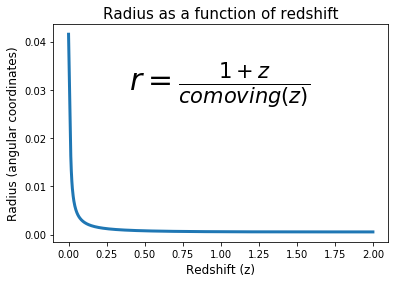

In [96]:
plt.plot(np.linspace(0, 2, 10000), radius_threshold(np.linspace(0, 2, 10000)), "-", lw = 3)
plt.title("Radius as a function of redshift", fontsize = 15)
plt.ylabel("Radius (angular coordinates)", fontsize = 12)
plt.xlabel("Redshift (z)", fontsize = 12)
string = r"$r = \frac{1+z}{comoving(z)}$"
plt.text(0.4, 0.03, s = string, fontsize = 30)
plt.show()

In [14]:
radius_df = pd.DataFrame(np.array([z_array, sparse_radius]).T, columns = ["z", "radius"])
radius = Table.from_pandas(radius_df)
radius.write('radius_training_north.fits', format = 'fits')

In [51]:
hdul = fits.open("radius_training_north.fits")  # open a FITS file
data = hdul[1].data

In [52]:
hdul = fits.open("radius_training.fits")  # open a FITS file
data2 = hdul[1].data

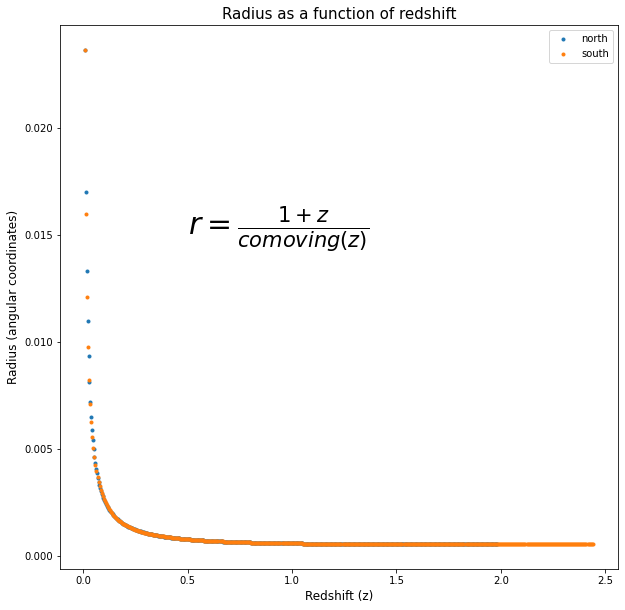

In [53]:
plt.figure(figsize = (10, 10))
plt.plot(data.z, data.radius, ".", label = "north")
plt.plot(data2.z, data2.radius, ".", label = "south")
plt.title("Radius as a function of redshift", fontsize = 15)
plt.ylabel("Radius (angular coordinates)", fontsize = 12)
plt.xlabel("Redshift (z)", fontsize = 12)
string = r"$r = \frac{1+z}{comoving(z)}$"
plt.text(0.5, 0.015, s = string, fontsize = 30)
plt.legend()
plt.show()

In [97]:
median = stats.binned_statistic(ra_dec.z_phot_median, ra_dec.z_phot_std, "median", bins = np.linspace(0.05, ra_dec.z_phot_median.max(), 100))
bins = np.linspace(0.05, ra_dec.z_phot_median.max(), 99)
z_threshold = interp1d(bins, np.minimum(median[0], np.ones(len(median[0]))*0.1), kind = "linear", fill_value = "extrapolate")

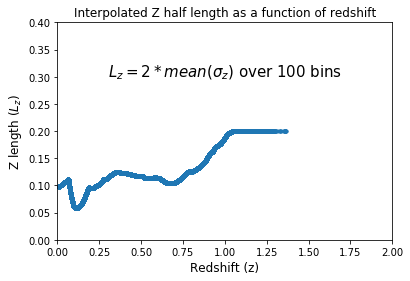

In [98]:
plt.plot(ra_dec.z_phot_median, 2*z_threshold(ra_dec.z_phot_median), ".")
plt.xlim(0, 2)
plt.ylim(0, 0.4)
plt.title("Interpolated Z half length as a function of redshift",  fontsize = 12)
plt.ylabel("Z length ($L_z$)",  fontsize = 12)
plt.xlabel("Redshift (z)",  fontsize = 12)
string = r"$L_z = 2* mean(\sigma_z)$ over 100 bins"
plt.text(0.3, 0.3, s = string, fontsize = 15)
plt.show()

In [31]:
threshold_df = pd.DataFrame(np.array([bins, np.minimum(median[0], np.ones(len(median[0]))*0.1)]).T, columns = ["z", "sigma_z_threshold"])
threshold = Table.from_pandas(threshold_df)
threshold.write('threshold_training_south.fits', format = 'fits')

In [32]:
hdul = fits.open("threshold_training_north.fits")  # open a FITS file
data = hdul[1].data

In [33]:
hdul = fits.open("threshold_training_south.fits")  # open a FITS file
data2 = hdul[1].data

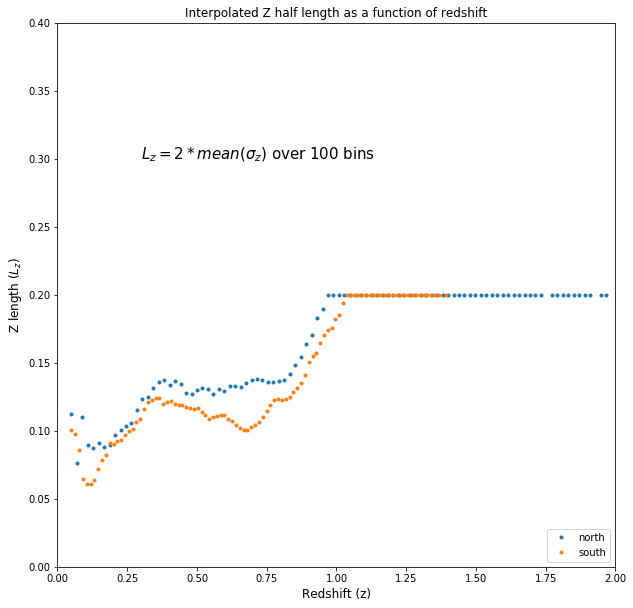

In [34]:
plt.figure(figsize = (10, 10))
plt.plot(data.z, 2*data.sigma_z_threshold, ".", label = "north")
plt.plot(data2.z, 2*data2.sigma_z_threshold, ".", label = "south")
plt.xlim(0, 2)
plt.ylim(0, 0.4)
plt.title("Interpolated Z half length as a function of redshift",  fontsize = 12)
plt.ylabel("Z length ($L_z$)",  fontsize = 12)
plt.xlabel("Redshift (z)",  fontsize = 12)
string = r"$L_z = 2* mean(\sigma_z)$ over 100 bins"
plt.text(0.3, 0.3, s = string, fontsize = 15)
plt.legend(loc = "lower right")
plt.show()

In [99]:
massive_sample = ra_dec[ra_dec.mass > 11.2].copy()
massive_sample["neighbors"] = np.zeros(len(massive_sample))
massive_sample["local_neighbors"] = np.zeros(len(massive_sample))
massive_sample.reset_index(inplace=True, drop = True)

In [100]:
len(massive_sample)

173106

In [101]:
tree = spatial.cKDTree(ra_dec[["x", "y"]], copy_data = True)

In [102]:
radius = 1
small_radius = 0.5
mini_radius = 0.1

indexable = ra_dec[["z_phot_median", "x", "y", "mass", "gauss_z", "gid", "z_phot_std"]].values.copy()
iterrator = massive_sample.copy()

In [103]:
len(iterrator)

173106

In [104]:
pbar = display.ProgressBar(len(massive_sample)-1)
pbar.display()
for i, row in iterrator.iterrows():
    neighbors = tree.query_ball_point([row.x, row.y], radius_threshold(row.z_phot_median))
    if len(neighbors) > 0:
        local_data = indexable[neighbors]
        
        z_c = z_threshold(row.z_phot_median)
        cylinder = np.abs(np.vstack(local_data[:, 4]) - row.z_phot_median)
        weight_array = cylinder < 2*z_c
        weights = weight_array.sum(axis = 1)/oversample
        
        approx_cluster = np.append(local_data, np.reshape(weights, newshape = (len(weights), 1)), axis = 1)
        cluster = approx_cluster[approx_cluster[:, -1] > 0]
        
        r_smaller = radius_threshold(row.z_phot_median)
        small_cluster = cluster[np.sqrt(np.array((cluster[:, 1] - row.x)**2 + (cluster[:, 2] - row.y)**2).astype(float)) < small_radius*r_smaller]
        mini_cluster = cluster[np.sqrt(np.array((cluster[:, 1] - row.x)**2 + (cluster[:, 2] - row.y)**2).astype(float)) < mini_radius*r_smaller]
        
        massive_sample.at[i, "neighbors"] = np.sum(cluster[:, -1])
        massive_sample.at[i, "local_neighbors"] = np.sum(small_cluster[:, -1])
        
    
    pbar.progress = i

[============================================================] 173105/173105

In [105]:
bins = np.arange(0.05, massive_sample.z_phot_median.max(), 0.01)
binned = [massive_sample[np.logical_and(massive_sample.z_phot_median>=i-.025, massive_sample.z_phot_median<=i+.025)].copy() for i in bins]
clusters = pd.DataFrame()
threshold1 = np.empty(len(binned))
threshold2 = np.empty(len(binned))
for i in range(len(binned)):
    threshold1[i] = np.mean(binned[i].neighbors) + 1.8*np.sqrt(np.mean(binned[i].neighbors))
    threshold2[i] = np.mean(binned[i].local_neighbors) + 1.2*np.sqrt(np.mean(binned[i].local_neighbors))

In [106]:
thresh1 = interp1d(bins, threshold1, kind = "linear", fill_value = "extrapolate")
thresh2 = interp1d(bins, threshold2, kind = "linear", fill_value = "extrapolate")

In [107]:
massive_sample.sort_values("neighbors", ascending = False).head()

,RELEASE,BRICKID,OBJID,Z_PHOT_MEAN,Z_PHOT_MEDIAN,Z_PHOT_STD,Z_PHOT_L68,Z_PHOT_U68,Z_PHOT_L95,Z_PHOT_U95,...,magZ,magW1,RA_r,DEC_r,gid,gauss_z,y,x,neighbors,local_neighbors
164477,9010,55610,8296,0.022018,0.021281,0.004456,0.018987,0.025929,0.016097,0.033467,...,11.608229,12.021848,5.265797,-0.984190,3.017079e+18,"[0.025587438547469307, 0.019469561587128516, 0...",49.026010,51.720284,993.333333,320.466667
138134,9010,485713,343,0.014155,0.013689,0.004381,0.009999,0.018135,0.007143,0.022620,...,11.544753,12.011839,0.666121,0.489914,3.816595e+17,"[0.01574710593805176, 0.016380626865910207, 0....",50.500114,48.683608,988.733333,240.600000
168774,9010,58854,2710,0.017600,0.017774,0.003376,0.013718,0.020825,0.011497,0.023791,...,12.159399,12.531728,5.273634,-0.967849,3.021570e+18,"[0.013871515027862519, 0.017377361464824586, 0...",49.042351,51.766792,882.566667,272.366667
46966,9010,337098,1516,0.023808,0.023535,0.003851,0.020345,0.027221,0.017107,0.030306,...,12.742308,13.107356,4.233488,0.018425,2.425610e+18,"[0.01724525750206822, 0.031038593205989114, 0....",50.028626,52.075138,651.100000,181.966667
165333,9010,52450,7710,0.017969,0.017719,0.005462,0.012766,0.023148,0.010087,0.030407,...,11.738894,12.129835,5.255918,-1.005277,3.011419e+18,"[0.017930866100865764, 0.022190172509850496, 0...",49.004923,51.660033,613.300000,195.533333


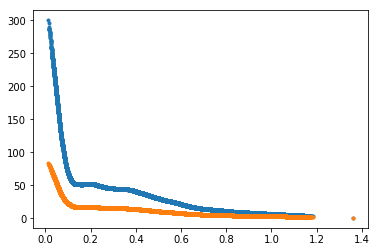

In [108]:
graph1 = thresh1(massive_sample.z_phot_median)
graph2 = thresh2(massive_sample.z_phot_median)
plt.plot(massive_sample.z_phot_median, graph1, ".")
plt.plot(massive_sample.z_phot_median, graph2, ".")
plt.show()

In [109]:
threshold_df = pd.DataFrame(np.array([bins, threshold1, threshold2]).T, columns = ["z", "neighbor_threshold1", "neighbor_threshold2"])
threshold = Table.from_pandas(threshold_df)
threshold.write('neighbor_training_south_2.fits', format = 'fits')

In [110]:
hdul = fits.open("neighbor_training_north.fits")  # open a FITS file
data = hdul[1].data

In [111]:
hdul = fits.open("neighbor_training_south.fits")  # open a FITS file
data2 = hdul[1].data

In [112]:
hdul = fits.open("neighbor_training_south_2.fits")  # open a FITS file
data3 = hdul[1].data

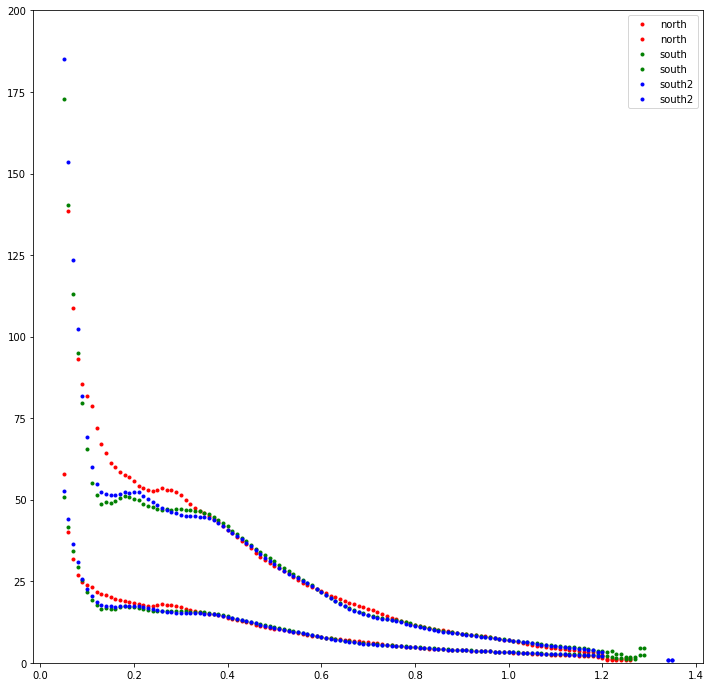

In [115]:

plt.figure(figsize = (12, 12))
plt.plot(data.z, data.neighbor_threshold1, ".r", label = "north")
plt.plot(data.z, data.neighbor_threshold2, ".r", label = "north")
plt.plot(data2.z, data2.neighbor_threshold1, ".g", label = "south")
plt.plot(data2.z, data2.neighbor_threshold2, ".g", label = "south")
plt.plot(data3.z, data3.neighbor_threshold1, ".b", label = "south2")
plt.plot(data3.z, data3.neighbor_threshold2, ".b", label = "south2")
plt.ylim(0, 200)
#plt.xlim(0, 2.5)
plt.legend()
plt.show()